In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
import os

In [2]:
# uncomment this cell if you want interactive plots

#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [3]:
reg_DEGs = re.compile(r'(\S+_vs_\S+)_DEGs\.csv')

total_long = pd.DataFrame()

filenames = os.listdir('.')
for filename in filenames:
    srch = reg_DEGs.search(filename)
    if srch:
        print("Processing file: " + filename)
        tmp_df = pd.read_csv(filename,index_col=0)
        tmp_df['Sample'] = srch.group(1)
        total_long = pd.concat([total_long,tmp_df],axis=0)

total_long.to_csv('RNAseq_vs_STAT_long.csv')
total_long_fil = total_long[total_long['padj']<0.05].copy()
total_long_fil.index.name='Symbol'
total_long_fil

Processing file: OSS_vs_STAT_DEGs.csv
Processing file: HSS_vs_STAT_DEGs.csv
Processing file: siCDK2_PSS_vs_CTL_STAT_DEGs.csv
Processing file: siCDK2_STAT_vs_CTL_STAT_DEGs.csv
Processing file: CTL_PSS_vs_CTL_STAT_DEGs.csv
Processing file: PSS_vs_STAT_DEGs.csv
Processing file: LSS_vs_STAT_DEGs.csv


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Sample
Symbol,,,,,,,
AAR2,1174.045839,0.643248,0.204709,3.142250,1.676548e-03,1.653883e-02,OSS_vs_STAT
AATK,52.401008,-1.090721,0.310516,-3.512607,4.437332e-04,6.227444e-03,OSS_vs_STAT
ABCA3,1711.252463,-0.750373,0.207670,-3.613287,3.023399e-04,4.650149e-03,OSS_vs_STAT
ABCA4,80.519493,-1.385005,0.365961,-3.784566,1.539769e-04,2.763943e-03,OSS_vs_STAT
ABCA6,2001.388738,-1.667759,0.385127,-4.330414,1.488296e-05,4.466757e-04,OSS_vs_STAT
...,...,...,...,...,...,...,...
ZWINT,524.379153,-0.877933,0.239933,-3.659073,2.531289e-04,1.098406e-03,LSS_vs_STAT
ZXDC,820.185820,0.999545,0.143934,6.944459,3.799133e-12,6.225558e-11,LSS_vs_STAT
ZYX,4317.335815,0.923746,0.190920,4.838379,1.309025e-06,9.386575e-06,LSS_vs_STAT


In [4]:
# transforiming to wide format
total_wide=total_long_fil.pivot_table(index='Sample',columns=['Symbol'],values='log2FoldChange').fillna(0)
df_trivial = pd.DataFrame([np.zeros(len(total_wide.columns))], columns=total_wide.columns, index=['STAT_vs_STAT'])
total_wide = pd.concat([total_wide,df_trivial],axis=0).copy()
total_wide.T.to_csv('RNAseq_vs_STAT_wide.csv')
# removing old PRC2 KNs
#total_wide.drop(labels=['EZLSS_vs_STAT','EZST_vs_STAT','LSS_Kns_vs_STAT','SUZLSS_vs_STAT','SUZST_vs_STAT'],inplace=True,axis='index')
total_wide

Symbol,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,AADAT,AAK1,...,ZW10,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
CTL_PSS_vs_CTL_STAT,0.000000,-1.321978,0.00000,-0.426488,-0.729360,-0.408361,2.635887,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.325294,0.303927,0.836621,-0.497239,0.800973,0.759847,0.000000,0.000000
HSS_vs_STAT,0.000000,-1.270867,0.00000,-0.867432,-0.754503,0.000000,0.000000,0.000000,0.000000,1.172671,...,0.639563,0.000000,-0.717699,0.000000,0.994083,0.000000,1.398917,1.394546,0.806321,0.000000
LSS_vs_STAT,-0.821211,0.000000,-0.60302,-1.071422,-1.024126,-0.417948,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.877933,0.000000,0.000000,0.999545,0.000000,0.923746,0.960650,0.586138,0.000000
OSS_vs_STAT,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629850,0.683942,0.000000,0.000000
PSS_vs_STAT,0.000000,-2.130772,0.00000,-0.958698,-0.983332,0.000000,2.501380,1.148867,0.000000,0.000000,...,0.000000,-1.114343,0.000000,0.000000,0.815245,0.000000,0.000000,0.000000,0.000000,0.000000
siCDK2_PSS_vs_CTL_STAT,0.000000,0.000000,0.00000,-0.422950,-0.539381,0.000000,4.294352,1.489072,0.592141,0.000000,...,0.000000,0.000000,0.000000,0.320056,0.542679,-0.415413,0.556561,0.511857,0.000000,-0.548464
siCDK2_STAT_vs_CTL_STAT,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.491969,1.359812,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
STAT_vs_STAT,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
pca = PCA(n_components=3)
Spca = pca.fit_transform(total_wide)
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_df = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=total_wide.index)
PCA_df

Explained variances by components:  [0.38502877 0.21518207 0.14462562] total variance explained:  0.7448364574824113


,PC1,PC2,PC3
CTL_PSS_vs_CTL_STAT,69.748004,-58.342520,13.400612
HSS_vs_STAT,81.477496,5.306511,-60.679912
LSS_vs_STAT,37.317488,26.565859,68.936699
OSS_vs_STAT,-35.289497,18.691640,11.148923
PSS_vs_STAT,3.698655,83.922980,-13.003719
siCDK2_PSS_vs_CTL_STAT,-11.780587,-41.803831,7.305960
siCDK2_STAT_vs_CTL_STAT,-74.419826,-19.799124,-12.667014
STAT_vs_STAT,-70.751732,-14.541516,-14.441549


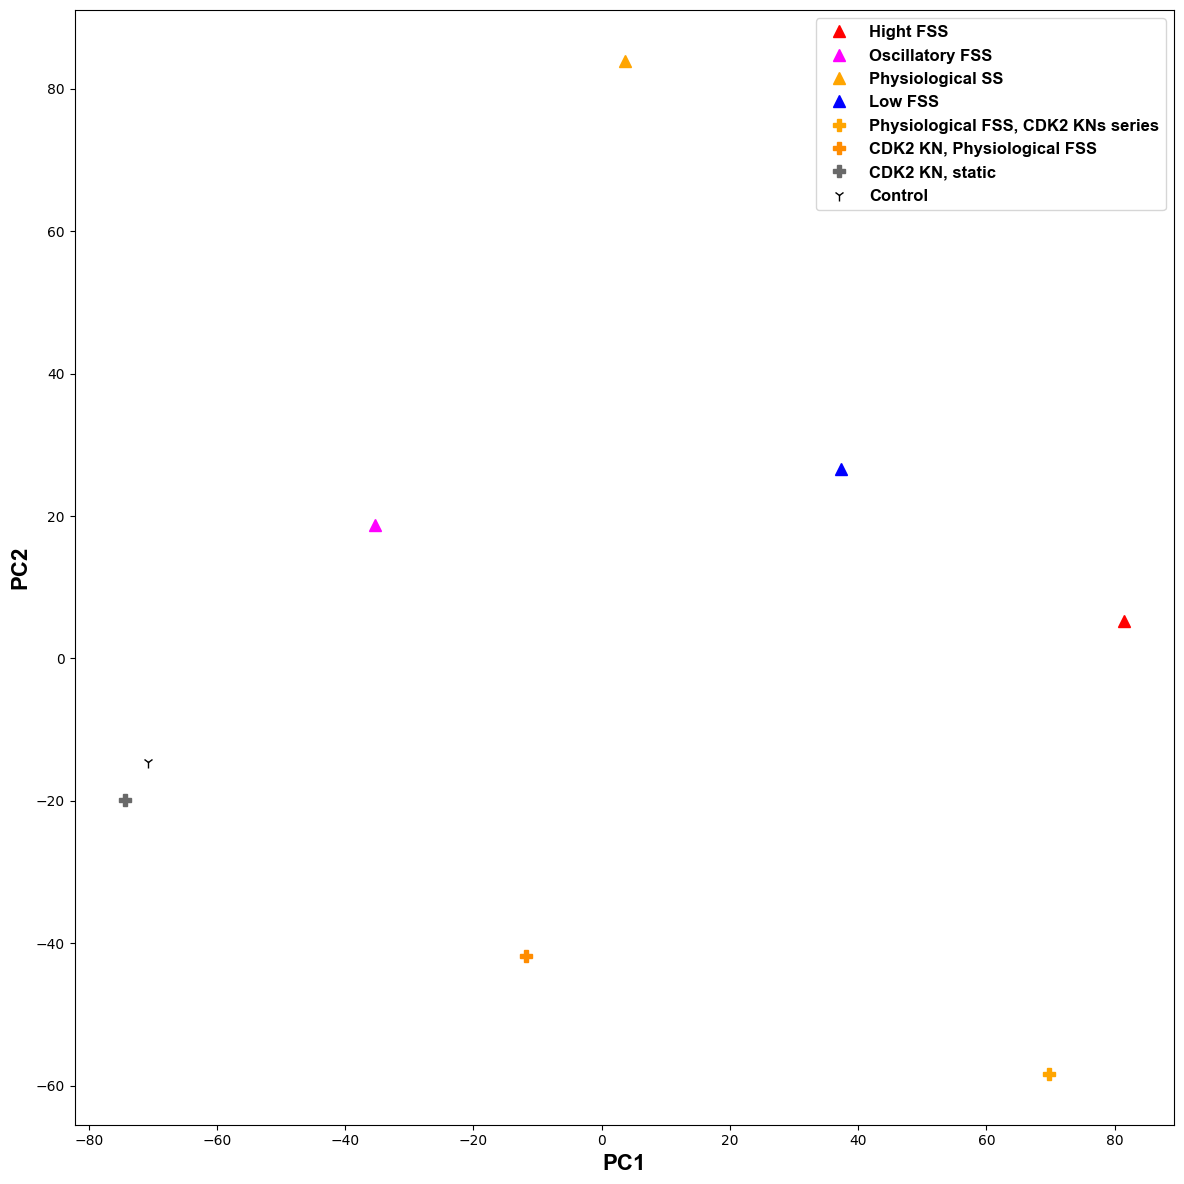

In [6]:
# 2D visualization


fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

# FSS conditions
ax.plot([PCA_df.loc['HSS_vs_STAT'].iloc[0]],[PCA_df.loc['HSS_vs_STAT'].iloc[1]],'^',color='red',label='Hight FSS',ms=8)
ax.plot([PCA_df.loc['OSS_vs_STAT'].iloc[0]],[PCA_df.loc['OSS_vs_STAT'].iloc[1]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([PCA_df.loc['PSS_vs_STAT'].iloc[0]],[PCA_df.loc['PSS_vs_STAT'].iloc[1]],'^',color='orange',label='Physiological SS',ms=8)
ax.plot([PCA_df.loc['LSS_vs_STAT'].iloc[0]],[PCA_df.loc['LSS_vs_STAT'].iloc[1]],'^',color='blue',label='Low FSS',ms=8)

# CDK2 KNs
ax.plot([PCA_df.loc['CTL_PSS_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['CTL_PSS_vs_CTL_STAT'].iloc[1]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([PCA_df.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[1]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([PCA_df.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[1]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)


# controls
ax.plot([PCA_df.loc['STAT_vs_STAT'].iloc[0]],[PCA_df.loc['STAT_vs_STAT'].iloc[1]],'1',color='black',label='Control',ms=8)


ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



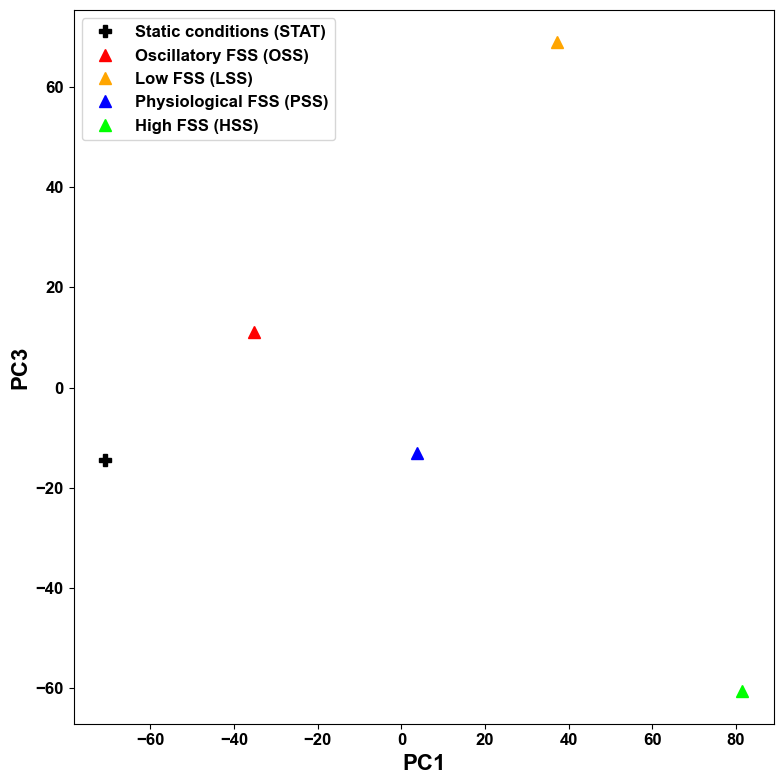

In [7]:
# 2D visualization


fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

xc=0
yc=2

# FSS conditions
ax.plot([PCA_df.loc['STAT_vs_STAT'].iloc[xc]],[PCA_df.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([PCA_df.loc['OSS_vs_STAT'].iloc[xc]],[PCA_df.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([PCA_df.loc['LSS_vs_STAT'].iloc[xc]],[PCA_df.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([PCA_df.loc['PSS_vs_STAT'].iloc[xc]],[PCA_df.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([PCA_df.loc['HSS_vs_STAT'].iloc[xc]],[PCA_df.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)


ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC3',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



In [8]:
# FSS value DPD

In [9]:
# preparing training sets
LSS_lbls = ['LSS_vs_STAT']
HSS_lbls = ['HSS_vs_STAT']

LSS_smpl = total_wide.loc[LSS_lbls]
HSS_smpl = total_wide.loc[HSS_lbls]


train_smpl = pd.concat([LSS_smpl,HSS_smpl],axis=0)
cls = list(np.zeros(len(LSS_smpl.index))) + list(np.ones(len(HSS_smpl.index)))

display(train_smpl)
display(cls)

Symbol,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,AADAT,AAK1,...,ZW10,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
LSS_vs_STAT,-0.821211,0.000000,-0.60302,-1.071422,-1.024126,-0.417948,0.0,0.0,0.0,0.000000,...,0.000000,-0.877933,0.000000,0.0,0.999545,0.0,0.923746,0.960650,0.586138,0.0
HSS_vs_STAT,0.000000,-1.270867,0.00000,-0.867432,-0.754503,0.000000,0.0,0.0,0.0,1.172671,...,0.639563,0.000000,-0.717699,0.0,0.994083,0.0,1.398917,1.394546,0.806321,0.0


[0.0, 1.0]

In [10]:
# SVM classifier and STV
svc_FSS = SVC(kernel='linear')
svc_FSS.fit(train_smpl,cls)
b_coeff_FSS = svc_FSS.intercept_[0]/linalg.norm(svc_FSS.coef_[0])
norm_vec_FSS = svc_FSS.coef_[0]/linalg.norm(svc_FSS.coef_[0])

norm_vec_df = pd.DataFrame(norm_vec_FSS,index=train_smpl.columns,columns=['norm_vec_FSS'])
#norm_vec_df.sort_values(by='norm_vec_FSS',ascending=False).to_csv('STV_FSS_value.csv')

norm_vec_df.sort_values(by='norm_vec_FSS',ascending=False)

,norm_vec_FSS
Symbol,
STAC2,0.070452
HSPA7,0.066531
HSPA6,0.066398
WNT9B_1,0.061181
WNT9B,0.054958
...,...
RNF133,-0.040022
DGKK,-0.041272
MSC,-0.041305


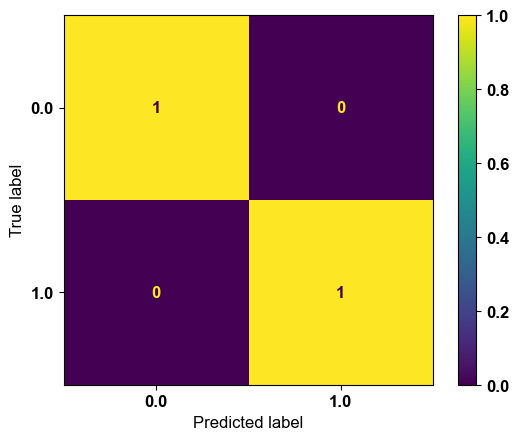

In [11]:
ConfusionMatrixDisplay.from_predictions(cls, svc_FSS.predict(train_smpl))
plt.show()
# clear separation

In [12]:
# calculating DPDs

DPD_vals = pd.DataFrame(np.zeros(len(total_wide.index)),index=total_wide.index,columns = ['DPD_FSS'])
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_FSS"] = b_coeff_FSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_FSS'])

b_coeff_FSS = svc_FSS.intercept_[0]/linalg.norm(svc_FSS.coef_[0]) - DPD_vals.loc[['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT'],'DPD_FSS'].mean()

for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_FSS"] = b_coeff_FSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_FSS'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.sort_values(by='DPD_FSS')

,DPD_FSS
LSS_vs_STAT,-66.643328
OSS_vs_STAT,-25.727254
siCDK2_STAT_vs_CTL_STAT,-19.621050
STAT_vs_STAT,-17.532518
siCDK2_PSS_vs_CTL_STAT,-11.142657
PSS_vs_STAT,-9.537554
CTL_PSS_vs_CTL_STAT,9.537554
HSS_vs_STAT,73.173823


In [13]:
# remodelling DPD

In [14]:
# preparing training sets
noremod_lbls = ['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT']
remod_lbls = ['HSS_vs_STAT','LSS_vs_STAT']

noremod_smpl = total_wide.loc[noremod_lbls]
remod_smpl = total_wide.loc[remod_lbls]


train_smpl = pd.concat([noremod_smpl,remod_smpl],axis=0)
cls = list(np.zeros(len(noremod_smpl.index))) + list(np.ones(len(remod_smpl.index)))

display(train_smpl)
display(cls)

Symbol,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,AADAT,AAK1,...,ZW10,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
PSS_vs_STAT,0.000000,-2.130772,0.00000,-0.958698,-0.983332,0.000000,2.501380,1.148867,0.0,0.000000,...,0.000000,-1.114343,0.000000,0.000000,0.815245,0.000000,0.000000,0.000000,0.000000,0.0
CTL_PSS_vs_CTL_STAT,0.000000,-1.321978,0.00000,-0.426488,-0.729360,-0.408361,2.635887,0.000000,0.0,0.000000,...,0.000000,0.000000,-0.325294,0.303927,0.836621,-0.497239,0.800973,0.759847,0.000000,0.0
HSS_vs_STAT,0.000000,-1.270867,0.00000,-0.867432,-0.754503,0.000000,0.000000,0.000000,0.0,1.172671,...,0.639563,0.000000,-0.717699,0.000000,0.994083,0.000000,1.398917,1.394546,0.806321,0.0
LSS_vs_STAT,-0.821211,0.000000,-0.60302,-1.071422,-1.024126,-0.417948,0.000000,0.000000,0.0,0.000000,...,0.000000,-0.877933,0.000000,0.000000,0.999545,0.000000,0.923746,0.960650,0.586138,0.0


[0.0, 0.0, 1.0, 1.0]

In [15]:
# SVM classifier and STV
svc_remod = SVC(kernel='linear')
svc_remod.fit(train_smpl,cls)
b_coeff_remod = svc_remod.intercept_[0]/linalg.norm(svc_remod.coef_[0])
norm_vec_remod = svc_remod.coef_[0]/linalg.norm(svc_remod.coef_[0])

norm_vec_df['norm_vec_remod']=norm_vec_remod
norm_vec_df.sort_values(by='norm_vec_remod',ascending=False).to_csv('STVs_SVM.csv')

norm_vec_df.sort_values(by='norm_vec_remod',ascending=False)

,norm_vec_FSS,norm_vec_remod
Symbol,,
NGFR,0.005624,0.096330
LOC107987180,0.000000,0.057833
LOC107986819,0.000000,0.053503
ALMS1-IT1,-0.002016,0.051326
ACTC1,0.007753,0.049817
...,...,...
ISL2,0.000000,-0.053939
LOC105376204,-0.006517,-0.055373
HSPA6,0.066398,-0.056952


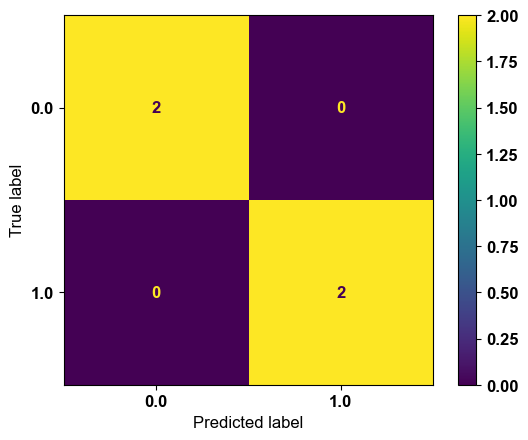

In [16]:
ConfusionMatrixDisplay.from_predictions(cls, svc_remod.predict(train_smpl))
plt.show()
# clear separation

In [17]:
# calculating DPDs

DPD_vals['DPD_remod']=np.nan
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_remod"] = b_coeff_remod + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_remod'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.sort_values(by='DPD_remod')

,DPD_FSS,DPD_remod
PSS_vs_STAT,-9.537554,-45.445124
CTL_PSS_vs_CTL_STAT,9.537554,-45.422515
siCDK2_PSS_vs_CTL_STAT,-11.142657,-17.920646
STAT_vs_STAT,-17.532518,-17.730092
siCDK2_STAT_vs_CTL_STAT,-19.621050,-17.055721
OSS_vs_STAT,-25.727254,-14.039402
HSS_vs_STAT,73.173823,45.429264
LSS_vs_STAT,-66.643328,45.438379


In [18]:
# oscillatory FSS

In [19]:
# preparing training sets
OSS_lbls = ['OSS_vs_STAT']
PSS_lbls = ['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT','HSS_vs_STAT','LSS_vs_STAT']
#PSS_lbls = ['HSS_vs_STAT','LSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']

OSS_smpl = total_wide.loc[OSS_lbls]
PSS_smpl = total_wide.loc[PSS_lbls]


train_smpl = pd.concat([PSS_smpl,OSS_smpl],axis=0)
cls = list(np.zeros(len(PSS_smpl.index))) + list(np.ones(len(OSS_smpl.index)))

display(train_smpl)
display(cls)

Symbol,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,AADAT,AAK1,...,ZW10,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
PSS_vs_STAT,0.000000,-2.130772,0.00000,-0.958698,-0.983332,0.000000,2.501380,1.148867,0.0,0.000000,...,0.000000,-1.114343,0.000000,0.000000,0.815245,0.000000,0.000000,0.000000,0.000000,0.0
CTL_PSS_vs_CTL_STAT,0.000000,-1.321978,0.00000,-0.426488,-0.729360,-0.408361,2.635887,0.000000,0.0,0.000000,...,0.000000,0.000000,-0.325294,0.303927,0.836621,-0.497239,0.800973,0.759847,0.000000,0.0
HSS_vs_STAT,0.000000,-1.270867,0.00000,-0.867432,-0.754503,0.000000,0.000000,0.000000,0.0,1.172671,...,0.639563,0.000000,-0.717699,0.000000,0.994083,0.000000,1.398917,1.394546,0.806321,0.0
LSS_vs_STAT,-0.821211,0.000000,-0.60302,-1.071422,-1.024126,-0.417948,0.000000,0.000000,0.0,0.000000,...,0.000000,-0.877933,0.000000,0.000000,0.999545,0.000000,0.923746,0.960650,0.586138,0.0
OSS_vs_STAT,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629850,0.683942,0.000000,0.0


[0.0, 0.0, 0.0, 0.0, 1.0]

In [20]:
# SVM classifier and STV
svc_OSS = SVC(kernel='linear')
svc_OSS.fit(train_smpl,cls)
b_coeff_OSS = svc_OSS.intercept_[0]/linalg.norm(svc_OSS.coef_[0])
norm_vec_OSS = svc_OSS.coef_[0]/linalg.norm(svc_OSS.coef_[0])

norm_vec_df['norm_vec_OSS']=norm_vec_OSS
norm_vec_df.sort_values(by='norm_vec_OSS',ascending=False).to_csv('STVs_SVM.csv')

norm_vec_df.sort_values(by='norm_vec_OSS',ascending=False)

,norm_vec_FSS,norm_vec_remod,norm_vec_OSS
Symbol,,,
TMEM100,0.010996,0.018276,0.056436
GALNT15,-0.001441,-0.005752,0.056116
LINC02880,0.041404,0.015287,0.054955
GPR183,-0.030052,-0.003679,0.054690
LOC105373585,-0.007642,-0.007401,0.050309
...,...,...,...
LOC105374378,0.002259,-0.010765,-0.059237
LOC105375509,0.014351,0.026339,-0.060611
ADM2,-0.017032,-0.000014,-0.061619


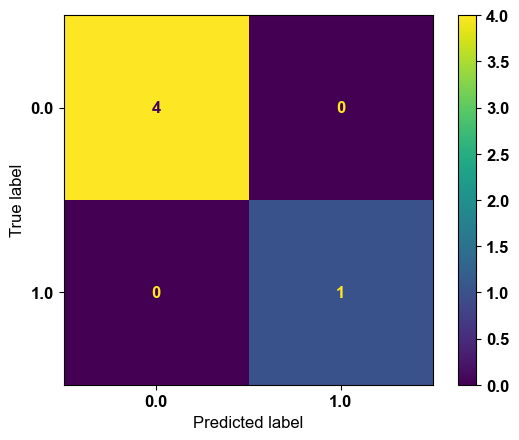

In [21]:
ConfusionMatrixDisplay.from_predictions(cls, svc_OSS.predict(train_smpl))
plt.show()
# clear separation

In [22]:
# calculating DPDs

DPD_vals['DPD_OSS']=np.nan
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_OSS"] = b_coeff_OSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_OSS'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.index.name='Condition'
DPD_vals.to_csv('DPD_vals.csv')
DPD_vals.sort_values(by='DPD_OSS')


,DPD_FSS,DPD_remod,DPD_OSS
Condition,,,
PSS_vs_STAT,-9.537554,-45.445124,-48.079568
LSS_vs_STAT,-66.643328,45.438379,-48.078710
CTL_PSS_vs_CTL_STAT,9.537554,-45.422515,-48.078704
HSS_vs_STAT,73.173823,45.429264,-48.033941
siCDK2_PSS_vs_CTL_STAT,-11.142657,-17.920646,1.664189
STAT_vs_STAT,-17.532518,-17.730092,34.012699
siCDK2_STAT_vs_CTL_STAT,-19.621050,-17.055721,34.791980
OSS_vs_STAT,-25.727254,-14.039402,48.061083


In [23]:
angle_FSS_OSS = (np.arccos(np.dot(norm_vec_df['norm_vec_FSS'],norm_vec_df['norm_vec_OSS']))/np.pi)*180
print(angle_FSS_OSS)

angle_remod_OSS = (np.arccos(np.dot(norm_vec_df['norm_vec_remod'],norm_vec_df['norm_vec_OSS']))/np.pi)*180
print(angle_remod_OSS)

angle_FSS_remod = (np.arccos(np.dot(norm_vec_df['norm_vec_FSS'],norm_vec_df['norm_vec_remod']))/np.pi)*180
print(angle_FSS_remod)


89.98165415163491
89.98615172450592
90.00373550319262


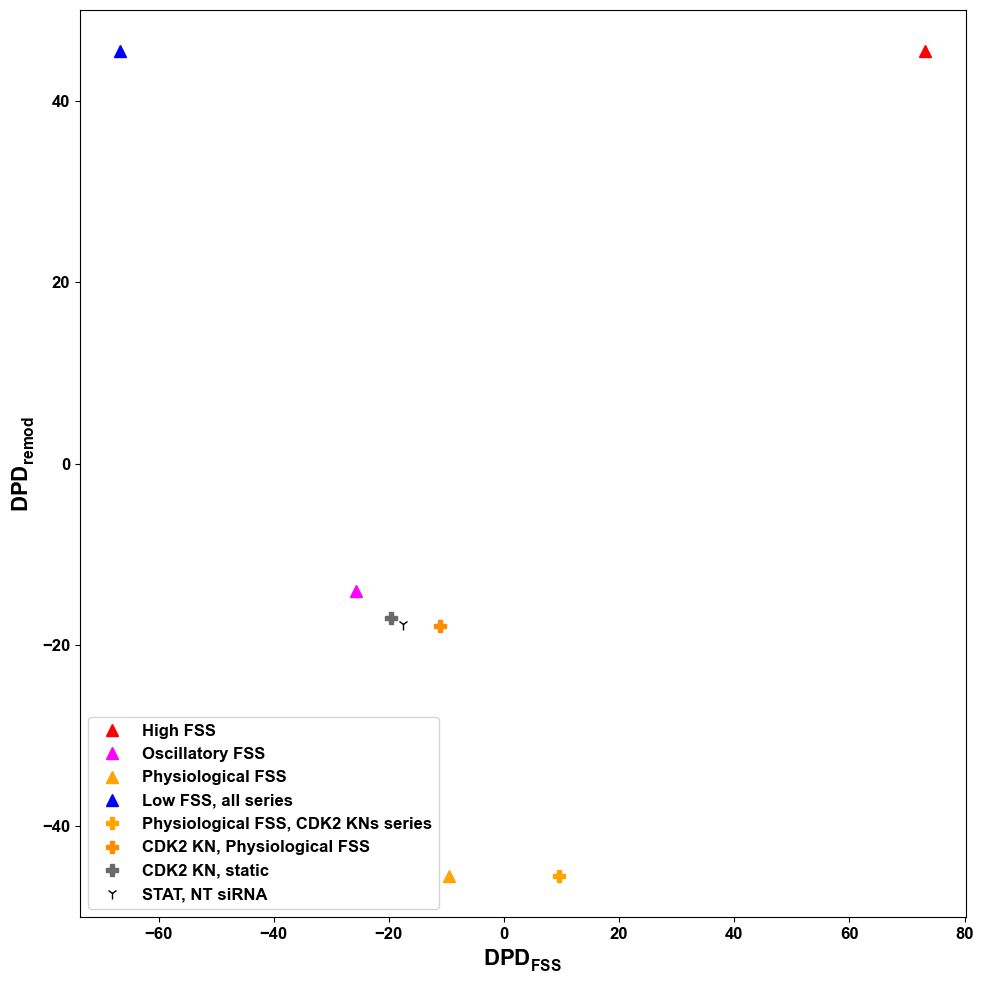

In [24]:
# 2D DPD visualization


fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 1

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Low FSS, all series',ms=8)

# CDK2 KNs
ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'1',color='black',label='STAT, NT siRNA',ms=8)

ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



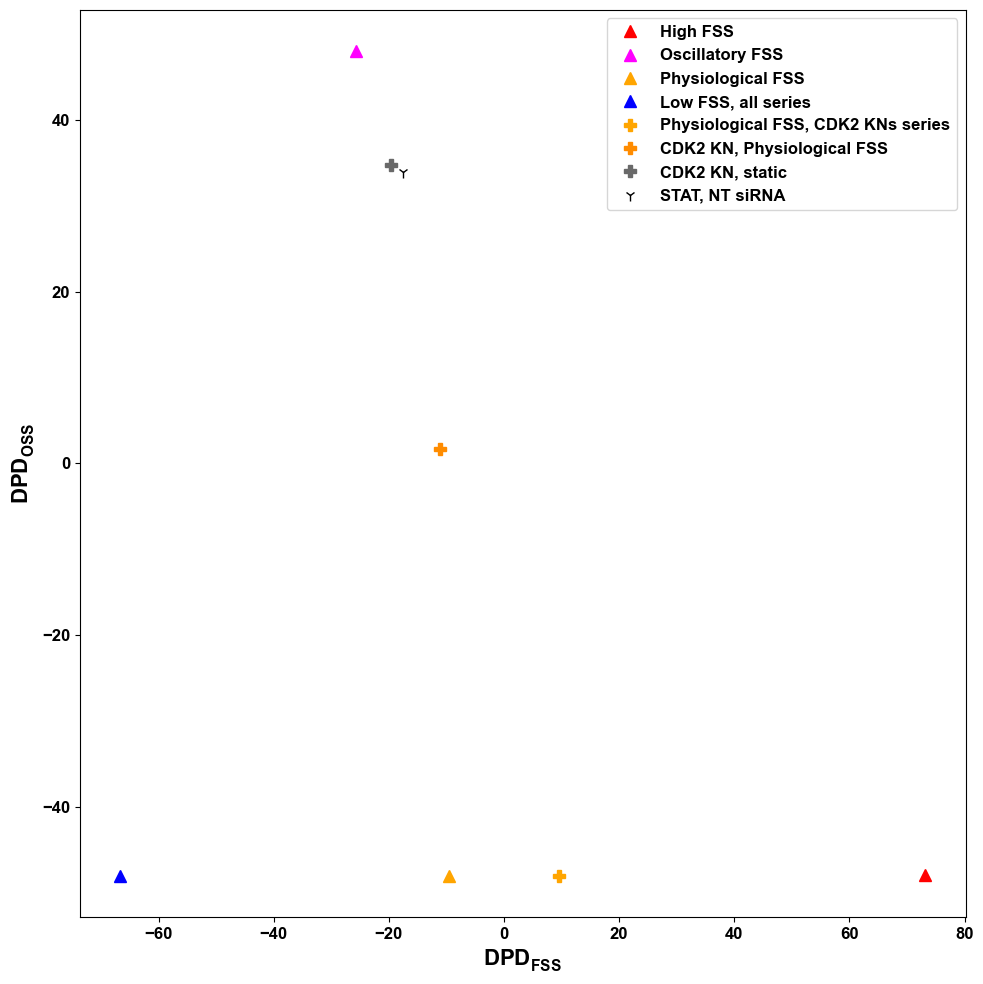

In [25]:
# 2D DPD visualization


fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 2

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Low FSS, all series',ms=8)

# CDK2 KNs
ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'1',color='black',label='STAT, NT siRNA',ms=8)

ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



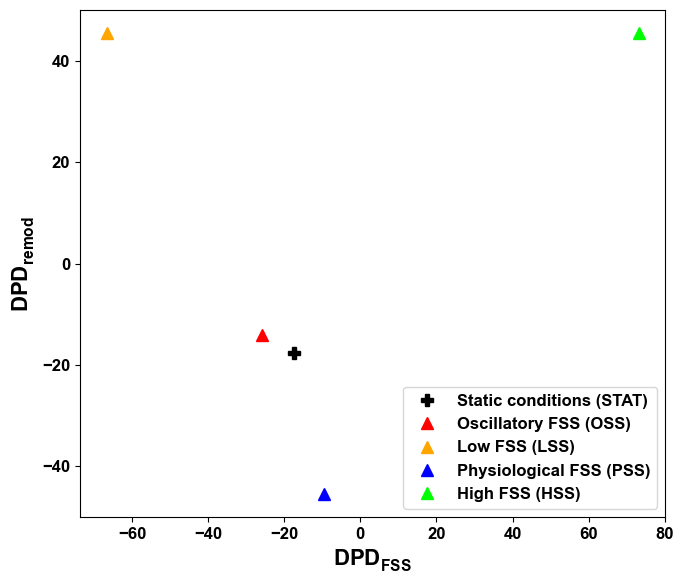

In [26]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 1

ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)



ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



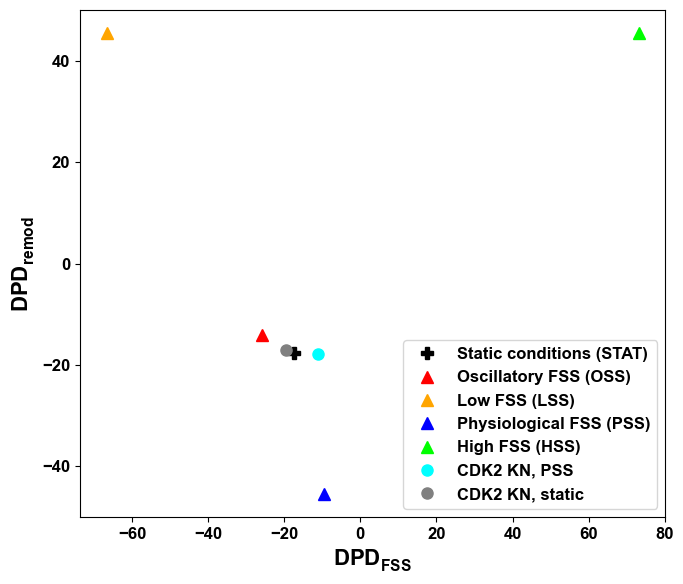

In [28]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 1

ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)


# CDK2 KNs
#ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'o',color='blue',label='PSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'o',color='cyan',label='CDK2 KN, PSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'o',color='grey',label='CDK2 KN, static',ms=8)


ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



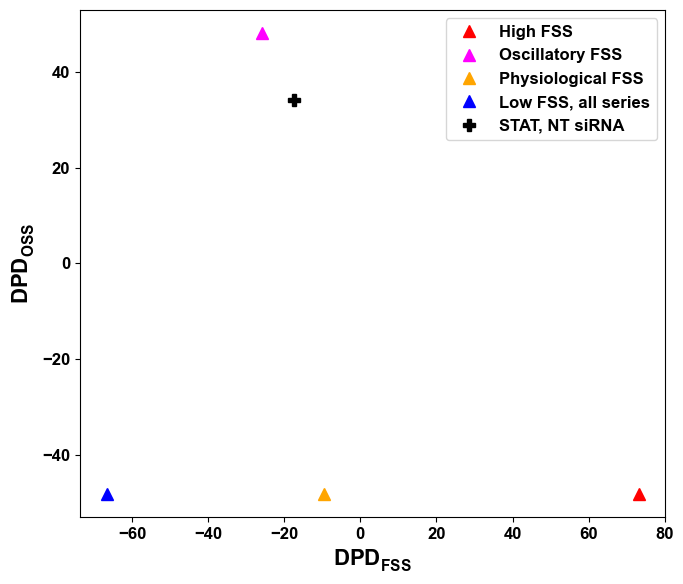

In [30]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 2

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Low FSS, all series',ms=8)


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='STAT, NT siRNA',ms=8)

ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



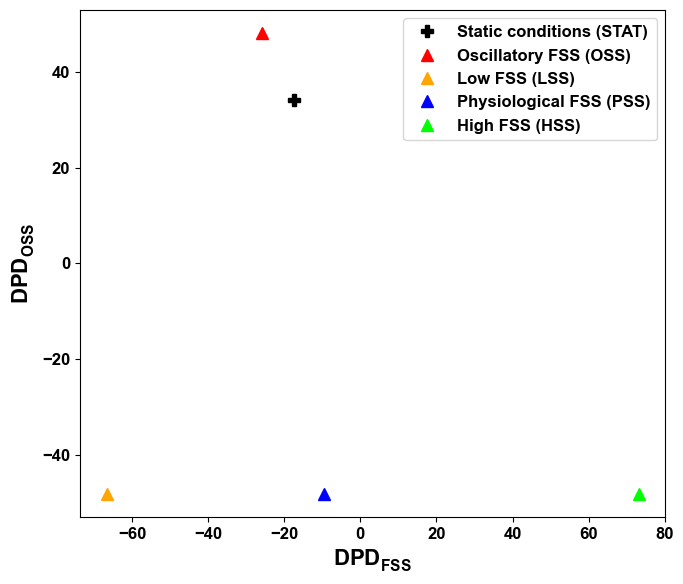

In [31]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 2


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)




ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



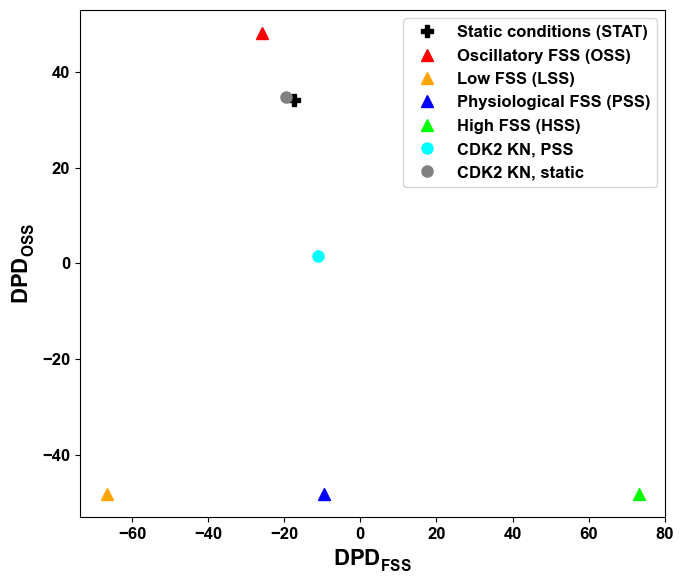

In [32]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 2


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)


# CDK2 KNs
#ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'o',color='blue',label='PSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'o',color='cyan',label='CDK2 KN, PSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'o',color='grey',label='CDK2 KN, static',ms=8)

ax.set_xlabel(r'$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel(r'$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()

